In [1]:
import matplotlib.pyplot as plt
from bica import *

In [2]:
import numpy as np

In [3]:
from random import *

In [4]:
NUM_OF_ACTS = 50000

In [5]:
bica = Bica()
pen_states = np.empty((2,0))
hand_states= np.empty((2,0))
bica_actions = ["boot","food","balls","tickle","pat","threaten","hill","matress","cave","wake","fish"]
                


for i in range(NUM_OF_ACTS):
    bica_pen = np.array([[bica.pen_state[0]], [bica.pen_state[1]]], dtype=float)
    bica_hand = np.array([[bica.hand_state[0]], [bica.hand_state[1]]], dtype=float)
    pen_states = np.append(pen_states, bica_pen, 1)
    hand_states = np.append(hand_states, bica_hand, 1)
    rnd = randint(0,len(bica_actions)-1)
    bica.interact(bica_actions[rnd])
print(pen_states)

In [6]:
for i in range(NUM_OF_ACTS):
    bica_pen = np.array([[bica.pen_state[0]], [bica.pen_state[1]]], dtype=float)
    bica_hand = np.array([[bica.hand_state[0]], [bica.hand_state[1]]], dtype=float)
    pen_states = np.append(pen_states, bica_pen, 1)
    hand_states = np.append(hand_states, bica_hand, 1)
    results = { i : bica.get_distance_after(i) for i in bica_actions }
    values = np.array(list(results.values()), dtype=float)
    mean = np.mean(values)
    sd = np.std(values)
    #min_res = min([i for i in results.values()])
    min_acts = [i for i in results.keys() if results[i] < mean]
    rnd = randint(0,len(min_acts)-1)
    bica.interact(min_acts[rnd])
print(min_acts)

['pat', 'tickle']


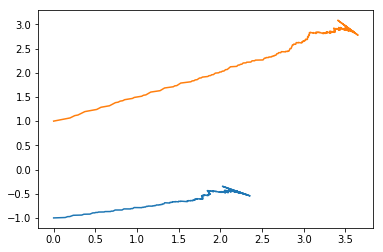

In [7]:
plt.plot(pen_states[0],pen_states[1])
plt.plot(hand_states[0],hand_states[1])
plt.savefig("states.png")